# Revisão de código 

Olá! 

Meu nome é Suelen. Estou feliz em revisar seu projeto hoje!

Quando vejo um erro pela primeira vez, apenas aponto. Deixarei você encontrá-lo e corrigi-lo sozinho. Além disso, ao longo do texto, farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Mas se você ainda não consegue lidar com essa tarefa, darei uma dica mais precisa na próxima iteração e também alguns exemplos práticos. Estarei aberto a feedbacks e discussões sobre o tema.

Você pode encontrar meus comentários em caixas verdes, amarelas ou vermelhas como estas:


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Sucesso. Tudo está correto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário: </b> <a class="tocSkip"></a>

Observações. Algumas recomendações.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário: </b> <a class="tocSkip"></a>

O bloco requer algumas correções. O trabalho não pode ser aceito com os comentários vermelhos.
</div>

Você pode me responder usando isto:

<div class="alert alert-block alert-info">
<b> Resposta </b> <a class="tocSkip"></a>
</div>

# Projeto 11 - Projeto Integrado 2

##### Você trabalha em uma startup que vende produtos alimentícios. Você precisa analisar o comportamento do usuário para o aplicativo da empresa.

## Passo 1 - Abra o arquivo de dados e leia a informação geral

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy import stats

In [2]:
#caminho do arquivo
logs_exp_us = pd.read_csv('/datasets/logs_exp_us.csv', sep='\t')

## Passo 2 - Prepare os dados para análise

In [3]:
print(logs_exp_us.head())
print(logs_exp_us.info())

                 EventName         DeviceIDHash  EventTimestamp  ExpId
0         MainScreenAppear  4575588528974610257      1564029816    246
1         MainScreenAppear  7416695313311560658      1564053102    246
2  PaymentScreenSuccessful  3518123091307005509      1564054127    248
3         CartScreenAppear  3518123091307005509      1564054127    248
4  PaymentScreenSuccessful  6217807653094995999      1564055322    248
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       244126 non-null  object
 1   DeviceIDHash    244126 non-null  int64 
 2   EventTimestamp  244126 non-null  int64 
 3   ExpId           244126 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 7.5+ MB
None


In [4]:
#renomenado colunas e colocando em letras minusculas
logs_exp_us['EventName'] = logs_exp_us['EventName'].str.lower()

#colunas com lentra minusculas
logs_exp_us.columns = logs_exp_us.columns.str.lower()

In [5]:
print(logs_exp_us.head())

                 eventname         deviceidhash  eventtimestamp  expid
0         mainscreenappear  4575588528974610257      1564029816    246
1         mainscreenappear  7416695313311560658      1564053102    246
2  paymentscreensuccessful  3518123091307005509      1564054127    248
3         cartscreenappear  3518123091307005509      1564054127    248
4  paymentscreensuccessful  6217807653094995999      1564055322    248


In [6]:
#renomeando colunas
logs_exp_us = logs_exp_us.rename(columns={
    'eventname': 'event',
    'deviceidhash': 'id_dispositivo',
    'eventtimestamp': 'timestamp_event',
    'expid': 'id_experiment'
})


In [7]:
#preparaçãodos dados
#valores ausentes
print(logs_exp_us.isnull().sum())

#valores duplicados
print(logs_exp_us.duplicated().sum())

event              0
id_dispositivo     0
timestamp_event    0
id_experiment      0
dtype: int64
413


In [8]:
#converter'timestamp_event' para formato de data e hora
logs_exp_us['timestamp_event'] = pd.to_datetime(logs_exp_us['timestamp_event'], unit='s')
print(logs_exp_us.info())
print(logs_exp_us.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244126 entries, 0 to 244125
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   event            244126 non-null  object        
 1   id_dispositivo   244126 non-null  int64         
 2   timestamp_event  244126 non-null  datetime64[ns]
 3   id_experiment    244126 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 7.5+ MB
None
                     event       id_dispositivo     timestamp_event  \
0         mainscreenappear  4575588528974610257 2019-07-25 04:43:36   
1         mainscreenappear  7416695313311560658 2019-07-25 11:11:42   
2  paymentscreensuccessful  3518123091307005509 2019-07-25 11:28:47   
3         cartscreenappear  3518123091307005509 2019-07-25 11:28:47   
4  paymentscreensuccessful  6217807653094995999 2019-07-25 11:48:42   

   id_experiment  
0            246  
1            246  
2       

In [9]:
# Converter 'timestamp_event' para formato de data e hora
logs_exp_us['data_hora'] = pd.to_datetime(logs_exp_us['timestamp_event'], unit='s')

# Criar uma nova coluna apenas com a data (sem a hora)
logs_exp_us['data'] = logs_exp_us['data_hora'].dt.date

# Verificando as novas colunas
print(logs_exp_us[['timestamp_event', 'data_hora', 'data']].head())

      timestamp_event           data_hora        data
0 2019-07-25 04:43:36 2019-07-25 04:43:36  2019-07-25
1 2019-07-25 11:11:42 2019-07-25 11:11:42  2019-07-25
2 2019-07-25 11:28:47 2019-07-25 11:28:47  2019-07-25
3 2019-07-25 11:28:47 2019-07-25 11:28:47  2019-07-25
4 2019-07-25 11:48:42 2019-07-25 11:48:42  2019-07-25


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Os dados foram lidos e processados corretamente:
- Colunas foram processadas para formato snake_case     
- Datas foram convertidas corretamente, utilizando o parâmetro `unit=s`  
    
</div>

## Passo 3 - Estude e verifique os dados

In [10]:
#1
#quantidade de eventos unicos
num_eventos_unicos = logs_exp_us['event'].nunique()
print(f"Quantidade de eventos únicos: {num_eventos_unicos}")

#quantidade de evenetos totais
num_registros = len(logs_exp_us)
print(f"Quantidade total de eventos (registros): {num_registros}")

Quantidade de eventos únicos: 5
Quantidade total de eventos (registros): 244126


- Foram identificados 5 eventos únicos

In [11]:
#2
#quantidade de users unicos
num_users_unicos = logs_exp_us['id_dispositivo'].nunique()
print(f"Quantidade de usuários únicos: {num_users_unicos}")

#quantidade de users totais
num_registros_users = len(logs_exp_us)
print(f"Quantidade total de usuários (registros): {num_registros_users}")

Quantidade de usuários únicos: 7551
Quantidade total de usuários (registros): 244126


- Foram identificados 7551 usuários únicos.

In [12]:
#3
#quantos eventos cada usuário realizou
events_per_user = logs_exp_us.groupby('id_dispositivo')['event'].count()

#média de eventos por usuário
media_events_per_user = events_per_user.mean()

print(f"Número médio de eventos por usuário: {media_events_per_user:.2f}")

Número médio de eventos por usuário: 32.33


<div class="alert alert-block alert-success">
<b>Comentário: </b> <a class="tocSkip"></a>

Estatísticas como média de eventos e quantidade de usuários únicos foram calculadas corretamente
    
</div>

- De acordo com os dados fornecidos foi concluido uma média de 32.33 eventos por usuário.

In [13]:
#4
#min e max
data_min = logs_exp_us['timestamp_event'].min()
data_max = logs_exp_us['timestamp_event'].max()

print(f"Data mínima: {data_min}")
print(f"Data máxima: {data_max}")

Data mínima: 2019-07-25 04:43:36
Data máxima: 2019-08-07 21:15:17


- Data do primeiro evento é 25/07/2019 e a data do último evento registrado é 07/08/2019

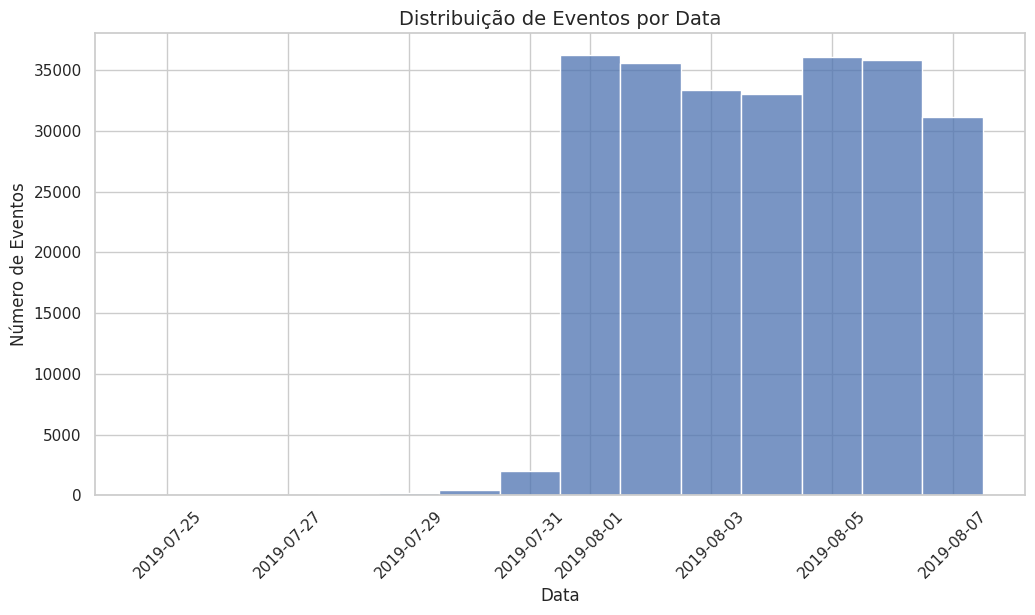

In [14]:
#4
#histograma
sns.set(style="whitegrid")

plt.figure(figsize=(12, 6))
sns.histplot(data=logs_exp_us, x='data', bins=30, kde=False)
plt.title('Distribuição de Eventos por Data', fontsize=14)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Número de Eventos', fontsize=12)
plt.xticks(rotation=45)
plt.show()

- Histograma com barras representando a quantidade de eventos por data. Chegando na conclusão que após 01/08/2019 o número de eventos subiram drasticamente. O aumento repentino na quantidade de eventos, pode indicar o início do período de coleta completa dos dados.

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- [x] A quantidade de ocorrências por evento foi analisada corretamente
- [x] Foram adicionadas suas observações sobre os resultados acima
</div>


In [15]:
#4
#corte de data
data_corte = pd.to_datetime('2019-07-31')

#filtrar os dados
dados_filtrados = logs_exp_us[logs_exp_us['timestamp_event'] >= data_corte]

#período filtrado
data_min_filtrada = dados_filtrados['timestamp_event'].min()
data_max_filtrada = dados_filtrados['timestamp_event'].max()

print(f"Período dos dados após o corte: {data_min_filtrada} a {data_max_filtrada}")

Período dos dados após o corte: 2019-07-31 01:11:46 a 2019-08-07 21:15:17


- Após análise do histograma concluimos que hávia dados que poderiamos nos atrapalhar, logo cortamos esses dados e filtramos somente o que de fato importa.

In [16]:
#total de eventos e usuários antes do corte
total_eventos_antes = logs_exp_us.shape[0]
total_usuarios_antes = logs_exp_us['id_dispositivo'].nunique()

#total de eventos e usuários depois do corte
total_eventos_depois = dados_filtrados.shape[0]
total_usuarios_depois = dados_filtrados['id_dispositivo'].nunique()

#porcentagem
eventos_perdidos = (total_eventos_antes - total_eventos_depois) / total_eventos_antes * 100
usuarios_perdidos = (total_usuarios_antes - total_usuarios_depois) / total_usuarios_antes * 100

print(f"Eventos perdidos: {eventos_perdidos:.2f}%")
print(f"Usuários perdidos: {usuarios_perdidos:.2f}%")
print(total_eventos_antes - total_eventos_depois)
print(total_usuarios_antes - total_usuarios_depois)

Eventos perdidos: 0.33%
Usuários perdidos: 0.12%
797
9


Registramos uma perda mínima de eventos e usuários. Dados:
 - Perdemos 797 eventos, o que é 0.33% do total
 - Perdemos 9 usuários, o que significa 0.12% do total de usuários.

In [17]:
#número de usuários únicos em cada grupo experimental após o corte
usuarios_por_grupo = dados_filtrados.groupby('id_experiment')['id_dispositivo'].nunique()

print(usuarios_por_grupo)

#verificar se todos os três grupos estão presentes
grupos_necessarios = {246, 247, 248}
grupos_presentes = set(usuarios_por_grupo.index)

if grupos_necessarios.issubset(grupos_presentes):
    print("Todos os três grupos experimentais estão presentes.")
else:
    grupos_faltantes = grupos_necessarios - grupos_presentes
    print(f"Os seguintes grupos estão faltando: {grupos_faltantes}")

id_experiment
246    2485
247    2517
248    2540
Name: id_dispositivo, dtype: int64
Todos os três grupos experimentais estão presentes.


- Conclusão: Possui usuário em todos os três grupos experimentais.

## Passo 4 - Estude o funil de eventos

In [18]:
#1
#frequência de cada evento no dataset filtrado
frequencia_eventos = dados_filtrados['event'].value_counts()

print(frequencia_eventos)

mainscreenappear           118681
offersscreenappear          46724
cartscreenappear            42623
paymentscreensuccessful     34253
tutorial                     1048
Name: event, dtype: int64


- De acordo com os dados, o evento mais realizado pelos usuários foi o de "main screen appear", com 118681 eventos.

In [19]:
#2
#total de usuários
total_usuarios = dados_filtrados['id_dispositivo'].nunique()

#número de usuários únicos que realizaram cada evento
usuarios_por_evento = dados_filtrados.groupby('event')['id_dispositivo'].nunique()

#ordem crescente
usuarios_por_evento_ordenado = usuarios_por_evento.sort_values(ascending=False)

#proporção de usuários que executaram cada ação pelo menos uma vez
proporcao_usuarios_por_evento = usuarios_por_evento_ordenado / total_usuarios

#número de usuários e a proporção de usuários por evento
resultado = pd.DataFrame({
    'num_usuarios': usuarios_por_evento_ordenado,
    'proporcao': proporcao_usuarios_por_evento
})

# Exibir o resultado
print(resultado)

                         num_usuarios  proporcao
event                                           
mainscreenappear                 7429   0.985017
offersscreenappear               4606   0.610713
cartscreenappear                 3742   0.496155
paymentscreensuccessful          3542   0.469637
tutorial                          845   0.112039


- O evento que possui o maior número de usuários é mainscreenapper com uma proporçao de 0.98 e um número de 7429 usuários.

In [20]:
#3

Ordem das Ações:
- MainScreenAppear (98.5% dos usuários): A maioria dos usuários visualizou a tela principal do aplicativo ou site. Isso é esperado, já que é a primeira interação em muitos casos.
- OffersScreenAppear (61.1% dos usuários): Cerca de 61% dos usuários visualizaram a página de ofertas, indicando que mais da metade interagiu com ofertas ou promoções.
- CartScreenAppear (49.6% dos usuários): Aproximadamente metade dos usuários colocou algum item no carrinho, o que sugere um interesse inicial em comprar.
- PaymentScreenSuccessful (46.9% dos usuários): Quase 47% dos usuários completaram o processo de pagamento, indicando uma alta taxa de conversão para aqueles que chegaram ao carrinho.
- Tutorial (11.2% dos usuários): Apenas 11% dos usuários visualizaram o tutorial, sugerindo que não é uma etapa fundamental ou que a maioria dos usuários optou por ignorar essa etapa.

A sequência de eventos parece clara: os usuários começam na tela principal (MainScreenAppear), depois podem explorar ofertas (OffersScreenAppear), adicionar itens ao carrinho (CartScreenAppear), e, finalmente, finalizar o pagamento (PaymentScreenSuccessful). O tutorial é um evento isolado e não parece fazer parte do fluxo natural de compras.



In [21]:
#4
# Dicionário com os eventos e número de usuários únicos que realizaram cada ação
eventos_usuarios = {
    'mainscreenappear': 7429,
    'offersscreenappear': 4606,
    'cartscreenappear': 3742,
    'paymentscreensuccessful': 3542
}

# Cálculo das proporções entre as etapas
proporcao_offers_main = eventos_usuarios['offersscreenappear'] / eventos_usuarios['mainscreenappear']
proporcao_cart_offers = eventos_usuarios['cartscreenappear'] / eventos_usuarios['offersscreenappear']
proporcao_payment_cart = eventos_usuarios['paymentscreensuccessful'] / eventos_usuarios['cartscreenappear']

# Exibição dos resultados

#B para A
print(f"Proporção de OffersScreenAppear para MainScreenAppear: {proporcao_offers_main:.4f} ({proporcao_offers_main * 100:.2f}%)")

#C para B
print(f"Proporção de CartScreenAppear para OffersScreenAppear: {proporcao_cart_offers:.4f} ({proporcao_cart_offers * 100:.2f}%)")

#D para C
print(f"Proporção de PaymentScreenSuccessful para CartScreenAppear: {proporcao_payment_cart:.4f} ({proporcao_payment_cart * 100:.2f}%)")

Proporção de OffersScreenAppear para MainScreenAppear: 0.6200 (62.00%)
Proporção de CartScreenAppear para OffersScreenAppear: 0.8124 (81.24%)
Proporção de PaymentScreenSuccessful para CartScreenAppear: 0.9466 (94.66%)


Taxa de conversão no início do funil:
- 62% dos usuários que visualizaram a tela principal (MainScreenAppear) chegaram até a tela de ofertas (OffersScreenAppear).
Taxa de conversão intermediária:
- 81.24% dos usuários que visualizaram a tela de ofertas chegaram ao carrinho (CartScreenAppear).
Taxa de conversão final:
- 94.66% dos usuários que visualizaram o carrinho completaram a compra (PaymentScreenSuccessful).

A maior queda de usuários ocorre logo no início do funil, entre a visualização da tela principal e a tela de ofertas. Esse é o ponto onde você pode concentrar esforços para melhorar a retenção de usuários, como por meio de uma navegação mais intuitiva, ofertas mais atrativas ou marketing mais focado.

In [22]:
#5
#Em qual fase você perde mais usuários?

A fase em que mais usuários são perdidos é entre a tela principal (MainScreenAppear) e a tela de ofertas (OffersScreenAppear).

A proporção de conversão nessa fase é de 62%, o que significa que 38% dos usuários que acessam a tela principal não chegam a visualizar as ofertas.

Essa é a fase crítica do funil, pois é onde ocorre a maior queda de usuários. Melhorar essa etapa pode trazer um impacto significativo no aumento de engajamento e conversão geral.

In [23]:
# Calculando a proporção total de conversão do funil
proporcao_total_funil = proporcao_offers_main * proporcao_cart_offers * proporcao_payment_cart

# Exibindo o resultado
print(f"A parcela de usuários que completam todo o funil é: {proporcao_total_funil:.4f} ({proporcao_total_funil * 100:.2f}%)")

A parcela de usuários que completam todo o funil é: 0.4768 (47.68%)


- Portanto, 47.64% dos usuários que iniciam o processo chegam até a conclusão com o pagamento bem-sucedido.

## Passo 5 - Estude os resultados do experimento

In [24]:
#1
print(usuarios_por_grupo)

id_experiment
246    2485
247    2517
248    2540
Name: id_dispositivo, dtype: int64


Como foi verificado antes, de acordo com os dados temos o seguinte resultado:
- 246 = 2485
- 247 = 2517
- 248 = 2540

In [25]:
#grupos 246 e 247
grupo_246 = dados_filtrados[dados_filtrados['id_experiment'] == 246]
grupo_247 = dados_filtrados[dados_filtrados['id_experiment'] == 247]

#contagem de eventos por usuário para cada grupo
eventos_por_usuario_246 = grupo_246.groupby('id_dispositivo')['event'].count()
eventos_por_usuario_247 = grupo_247.groupby('id_dispositivo')['event'].count()

#teste t
t_stat, p_value = ttest_ind(eventos_por_usuario_246, eventos_por_usuario_247, equal_var=False)

t_stat, p_value

(0.7516319851754527, 0.4523086550264601)

t_stat = 0.75: 
- O valor do t-statistic indica a diferença padronizada entre as médias dos dois grupos (grupo 246 e grupo 247). Um valor mais próximo de zero sugere que as médias dos dois grupos são bastante semelhantes.

p_value = 0.45: 
- O valor de p é maior que 0.05, o que significa que não há evidência estatisticamente significativa para rejeitar a hipótese nula. Ou seja, não há uma diferença estatisticamente significativa entre as médias de eventos por usuário nos dois grupos.

Podemos concluir que não há uma diferença significativa entre o número de eventos por usuário no grupo 246 e no grupo 247.

In [26]:
# Selecionar o evento mais popular
evento_mais_popular = frequencia_eventos.idxmax()

# Função para calcular proporção de usuários por evento
def proporcao_evento_por_grupo(evento):
    # Filtrar os dados pelo evento
    usuarios_por_evento = dados_filtrados[dados_filtrados['event'] == evento]
    
    # Contar o número de usuários que realizaram o evento em cada grupo
    usuarios_por_grupo = usuarios_por_evento.groupby('id_experiment')['id_dispositivo'].nunique()
    
    # Proporção de usuários em cada grupo
    proporcao_por_grupo = usuarios_por_grupo / usuarios_por_grupo.sum()
    
    return usuarios_por_grupo, proporcao_por_grupo

# Calcular para o evento mais popular
usuarios_evento_popular, proporcao_evento_popular = proporcao_evento_por_grupo(evento_mais_popular)
print(f"Usuários que realizaram '{evento_mais_popular}' por grupo:\n{usuarios_evento_popular}")
print(f"Proporção de usuários por grupo para '{evento_mais_popular}':\n{proporcao_evento_popular}")


Usuários que realizaram 'mainscreenappear' por grupo:
id_experiment
246    2452
247    2479
248    2498
Name: id_dispositivo, dtype: int64
Proporção de usuários por grupo para 'mainscreenappear':
id_experiment
246    0.330058
247    0.333692
248    0.336250
Name: id_dispositivo, dtype: float64


In [27]:
# Preparar uma tabela de contingência com o número de usuários que realizaram o evento em cada grupo
tabela_contingencia = pd.DataFrame({
    '246': [usuarios_evento_popular[246], usuarios_por_grupo[246] - usuarios_evento_popular[246]],
    '247': [usuarios_evento_popular[247], usuarios_por_grupo[247] - usuarios_evento_popular[247]],
    '248': [usuarios_evento_popular[248], usuarios_por_grupo[248] - usuarios_evento_popular[248]]
})

# Transpor a tabela para o formato adequado
tabela_contingencia = tabela_contingencia.T

# Aplicar o teste qui-quadrado
chi2_stat, p_val, dof, expected = chi2_contingency(tabela_contingencia)

print(f"Valor do qui-quadrado: {chi2_stat}")
print(f"Valor-p: {p_val}")

# Verificar se a diferença é estatisticamente significativa
if p_val < 0.05:
    print("Há uma diferença estatisticamente significativa entre os grupos.")
else:
    print("Não há diferença estatisticamente significativa entre os grupos.")

Valor do qui-quadrado: 0.9055372498559242
Valor-p: 0.6358652399730924
Não há diferença estatisticamente significativa entre os grupos.


In [28]:
# Função para repetir o teste para todos os eventos
def testar_eventos():
    resultados = {}
    
    for evento in frequencia_eventos.index:
        usuarios_evento, proporcao_evento = proporcao_evento_por_grupo(evento)
        
        # Criar a tabela de contingência
        tabela_contingencia = pd.DataFrame({
            '246': [usuarios_evento[246], usuarios_por_grupo[246] - usuarios_evento[246]],
            '247': [usuarios_evento[247], usuarios_por_grupo[247] - usuarios_evento[247]],
            '248': [usuarios_evento[248], usuarios_por_grupo[248] - usuarios_evento[248]]
        }).T
        
        # Aplicar o teste qui-quadrado
        chi2_stat, p_val, dof, expected = chi2_contingency(tabela_contingencia)
        
        # Armazenar os resultados
        resultados[evento] = {'qui2': chi2_stat, 'p_val': p_val}
        
    return resultados

# Rodar o teste para todos os eventos
resultados_teste = testar_eventos()

# Exibir os resultados
for evento, resultado in resultados_teste.items():
    print(f"Evento: {evento} - Valor-p: {resultado['p_val']:.5f}")
    if resultado['p_val'] < 0.05:
        print(f"--> Diferença significativa detectada no evento '{evento}'")

Evento: mainscreenappear - Valor-p: 0.63587
Evento: offersscreenappear - Valor-p: 0.41288
Evento: cartscreenappear - Valor-p: 0.22934
Evento: paymentscreensuccessful - Valor-p: 0.25184
Evento: tutorial - Valor-p: 0.96903


todos os valores-p para os eventos analisados são maiores que o nível de significância típico de 0,05, podemos tirar as seguintes conclusões:
- Não há diferença estatisticamente significativa: Para todos os eventos analisados, o valor-p maior que 0,05 indica que não há evidências estatísticas suficientes para afirmar que há diferença significativa entre os grupos experimentais (246, 247 e 248) quanto à proporção de usuários que realizaram cada evento.

- O experimento pode não ter causado impacto mensurável.

Recomendações: Recomendamos realizar outros testes, como de tempo gasto na aplicação, taxas de conversão em metas específicas, etc.), ou aumentar o tamanho da amostra, para verificar se há algum efeito que não foi detectado nessa análise.

In [29]:
# Função para testar proporções de eventos entre grupos
def teste_proporcao_evento(df, grupo_controle1, grupo_controle2, grupo_teste):
    # Encontrar o evento mais popular em cada grupo
    eventos_populares_grupo1 = df[df['id_experiment'] == grupo_controle1]['event'].value_counts().idxmax()
    eventos_populares_grupo2 = df[df['id_experiment'] == grupo_controle2]['event'].value_counts().idxmax()
    eventos_populares_grupo_teste = df[df['id_experiment'] == grupo_teste]['event'].value_counts().idxmax()

    # Calculando o número de usuários que realizaram o evento mais popular em cada grupo
    usuarios_grupo1 = df[(df['id_experiment'] == grupo_controle1) & (df['event'] == eventos_populares_grupo1)]['id_dispositivo'].nunique()
    usuarios_grupo2 = df[(df['id_experiment'] == grupo_controle2) & (df['event'] == eventos_populares_grupo2)]['id_dispositivo'].nunique()
    usuarios_grupo_teste = df[(df['id_experiment'] == grupo_teste) & (df['event'] == eventos_populares_grupo_teste)]['id_dispositivo'].nunique()

    # Calculando o número total de usuários em cada grupo
    total_usuarios_grupo1 = df[df['id_experiment'] == grupo_controle1]['id_dispositivo'].nunique()
    total_usuarios_grupo2 = df[df['id_experiment'] == grupo_controle2]['id_dispositivo'].nunique()
    total_usuarios_grupo_teste = df[df['id_experiment'] == grupo_teste]['id_dispositivo'].nunique()

    # Calculando a proporção de usuários que realizaram o evento mais popular em cada grupo
    proporcao_grupo1 = usuarios_grupo1 / total_usuarios_grupo1
    proporcao_grupo2 = usuarios_grupo2 / total_usuarios_grupo2
    proporcao_grupo_teste = usuarios_grupo_teste / total_usuarios_grupo_teste

    # Realizando o teste de proporção (teste Z) entre os grupos de controle e o grupo de teste
    n1 = total_usuarios_grupo1
    n2 = total_usuarios_grupo2
    n_teste = total_usuarios_grupo_teste
    p1 = proporcao_grupo1
    p2 = proporcao_grupo2
    p_teste = proporcao_grupo_teste

    # Proporção combinada dos grupos de controle
    p_pool_controle = (usuarios_grupo1 + usuarios_grupo2) / (n1 + n2)
    z_score_controle = (p1 - p2) / ((p_pool_controle * (1 - p_pool_controle) * (1 / n1 + 1 / n2)) ** 0.5)
    p_value_controle = 2 * (1 - stats.norm.cdf(abs(z_score_controle)))  # teste bicaudal

    # Proporção combinada dos grupos de controle e o grupo de teste
    p_pool_teste = (usuarios_grupo1 + usuarios_grupo2 + usuarios_grupo_teste) / (n1 + n2 + n_teste)
    z_score_teste_controle = (p_teste - p_pool_controle) / ((p_pool_teste * (1 - p_pool_teste) * (1 / n_teste + 1 / (n1 + n2))) ** 0.5)
    p_value_teste_controle = 2 * (1 - stats.norm.cdf(abs(z_score_teste_controle)))  # teste bicaudal

    # Exibir resultados
    print(f"Evento mais popular no grupo {grupo_controle1}: {eventos_populares_grupo1}")
    print(f"Proporção de usuários que realizaram o evento no grupo {grupo_controle1}: {proporcao_grupo1:.4f}")
    print(f"Evento mais popular no grupo {grupo_controle2}: {eventos_populares_grupo2}")
    print(f"Proporção de usuários que realizaram o evento no grupo {grupo_controle2}: {proporcao_grupo2:.4f}")
    print(f"Evento mais popular no grupo {grupo_teste}: {eventos_populares_grupo_teste}")
    print(f"Proporção de usuários que realizaram o evento no grupo {grupo_teste}: {proporcao_grupo_teste:.4f}")
    print(f"Teste de proporção (Z-score) entre grupo de teste e grupo de controle combinado: Z = {z_score_teste_controle:.4f}, Valor p = {p_value_teste_controle:.4f}")
    print(f"Teste de proporção (Z-score) entre grupo de controle 1 e grupo de controle 2: Z = {z_score_controle:.4f}, Valor p = {p_value_controle:.4f}")

    # Interpretar os resultados
    alpha = 0.05
    if p_value_teste_controle < alpha:
        print("Diferença significativa entre o grupo de teste e o grupo de controle combinado.")
    else:
        print("Nenhuma diferença significativa entre o grupo de teste e o grupo de controle combinado.")

    if p_value_controle < alpha:
        print("Diferença significativa entre os dois grupos de controle.")
    else:
        print("Nenhuma diferença significativa entre os dois grupos de controle.")

# Fazendo o teste para os grupos de controle 246 e 247 e o grupo de teste 248
teste_proporcao_evento(dados_filtrados, 246, 247, 248)

Evento mais popular no grupo 246: mainscreenappear
Proporção de usuários que realizaram o evento no grupo 246: 0.9867
Evento mais popular no grupo 247: mainscreenappear
Proporção de usuários que realizaram o evento no grupo 247: 0.9849
Evento mais popular no grupo 248: mainscreenappear
Proporção de usuários que realizaram o evento no grupo 248: 0.9835
Teste de proporção (Z-score) entre grupo de teste e grupo de controle combinado: Z = -0.7910, Valor p = 0.4290
Teste de proporção (Z-score) entre grupo de controle 1 e grupo de controle 2: Z = 0.5434, Valor p = 0.5869
Nenhuma diferença significativa entre o grupo de teste e o grupo de controle combinado.
Nenhuma diferença significativa entre os dois grupos de controle.


Como podemos observar que a alteração da fonte não impactou o comportamento: Os valores-p para todos os eventos forem altos (acima de 0,05), logo, podemos concluir que a alteração da fonte não resultou em uma mudança significativa no comportamento dos usuários.

In [30]:
# Definindo o nível de significância corrigido usando Bonferroni
nivel_significancia = 0.1
num_testes = 15  # 5 eventos x 3 comparações
nivel_significancia_corrigido = nivel_significancia / num_testes

print(f"Nível de significância corrigido: {nivel_significancia_corrigido:.4f}")

# Definir uma função para realizar o teste chi-quadrado e comparar os valores-p com o nível corrigido
def testar_evento(evento, grupo_248, grupo_controle, nome_grupo_controle):
    # Contar os usuários que realizaram o evento nos grupos
    contagem_grupo_248 = grupo_248[grupo_248['event'] == evento]['id_dispositivo'].nunique()
    contagem_grupo_controle = grupo_controle[grupo_controle['event'] == evento]['id_dispositivo'].nunique()
    
    # Criar uma tabela de contingência
    tabela_contingencia = [[contagem_grupo_248, grupo_248['id_dispositivo'].nunique() - contagem_grupo_248],
                           [contagem_grupo_controle, grupo_controle['id_dispositivo'].nunique() - contagem_grupo_controle]]
    
    # Realizar o teste qui-quadrado
    chi2, p_value, _, _ = chi2_contingency(tabela_contingencia)
    
    # Comparar o valor-p com o nível de significância corrigido
    significativo = p_value < nivel_significancia_corrigido
    resultado = "significativo" if significativo else "não significativo"
    
    print(f"Evento: {evento} - Comparação com {nome_grupo_controle} - Valor-p: {p_value:.5f} - {resultado}")

# Realizar o teste para cada evento nos diferentes grupos
eventos = ['mainscreenappear', 'offersscreenappear', 'cartscreenappear', 'paymentscreensuccessful', 'tutorial']

# Dados de exemplo para o grupo 248 (fontes alteradas) e grupos de controle 246 e 247
grupo_248 = dados_filtrados[dados_filtrados['id_experiment'] == 248]
grupo_246 = dados_filtrados[dados_filtrados['id_experiment'] == 246]
grupo_247 = dados_filtrados[dados_filtrados['id_experiment'] == 247]
grupo_controle_combinado = dados_filtrados[dados_filtrados['id_experiment'].isin([246, 247])]

# Testar cada evento para os grupos 248 vs. 246, 248 vs. 247 e 248 vs. controle combinado
for evento in eventos:
    testar_evento(evento, grupo_248, grupo_246, "grupo 246")
    testar_evento(evento, grupo_248, grupo_247, "grupo 247")
    testar_evento(evento, grupo_248, grupo_controle_combinado, "grupo controle combinado")


Nível de significância corrigido: 0.0067
Evento: mainscreenappear - Comparação com grupo 246 - Valor-p: 0.40356 - não significativo
Evento: mainscreenappear - Comparação com grupo 247 - Valor-p: 0.76640 - não significativo
Evento: mainscreenappear - Comparação com grupo controle combinado - Valor-p: 0.48977 - não significativo
Evento: offersscreenappear - Comparação com grupo 246 - Valor-p: 0.23833 - não significativo
Evento: offersscreenappear - Comparação com grupo 247 - Valor-p: 0.93290 - não significativo
Evento: offersscreenappear - Comparação com grupo controle combinado - Valor-p: 0.46226 - não significativo
Evento: cartscreenappear - Comparação com grupo 246 - Valor-p: 0.10535 - não significativo
Evento: cartscreenappear - Comparação com grupo 247 - Valor-p: 0.70921 - não significativo
Evento: cartscreenappear - Comparação com grupo controle combinado - Valor-p: 0.24746 - não significativo
Evento: paymentscreensuccessful - Comparação com grupo 246 - Valor-p: 0.23445 - não signi

- O nível de significância corrigido é calculado dividindo o nível original (0,1) pelo número de testes (15 no seu caso).
- Para cada evento da lista, o teste é realizado três vezes: comparando o grupo 248 com o grupo 246, o grupo 247 e o controle combinado.
- Nenhum dos eventos comparados entre o grupo com fontes alteradas (grupo 248) e os grupos de controle apresentou valor-p abaixo do nível de significância corrigido de 0,0067. Portanto, após a correção de Bonferroni, não há evidências estatísticas suficientes para concluir que os grupos diferem significativamente na frequência dos eventos analisados.

<div class="alert alert-info">
<strong>Comentário do estudante</strong>

Tive dificuldade na realização do Passo 5 do projeto, utilizei meios para me ajudar na realização.
</div>

# Conclusão do Projeto

(Descrição do projeto) Os designers gostariam de alterar as fontes de todo o aplicativo, mas os gerentes temem que os usuários achem o novo design intimidador. Eles decidem tomar a decisão com base nos resultados de um teste A/A/B.

- Efeito das fontes alteradas não foi significativo: A alteração nas fontes (grupo 248) não teve um impacto detectável no comportamento dos usuários em termos de eventos como mainscreenappear, offersscreenappear, cartscreenappear, paymentscreensuccessful e tutorial.

Os resultados indicam que essa mudança não gerou um efeito significativo no conjunto de eventos observados.